# Results of XVNLI

In [10]:
from evaluater import Evaluater
import pandas as pd
import numpy as np

languages = ['ar', 'fr', 'es', 'ru']
# store accuracy for each language
accuracy_dict = {}

# for each language
for lang in languages:
    for shot in [0, 1, 5, 10, 20, 25, 48]:
        df = pd.read_csv(f"result/XVNLI/{lang}/prediction_{shot}_shot.csv", sep=",", header=0)
        predictions = df["prediction"].values
        evaluater = Evaluater("nli", lang)
        accuracy = evaluater.accuracy(predictions)
        accuracy_dict[f"{lang}_{shot}"] = accuracy

# print accuracy in table
print("lang", end="\t")
for shot in [0, 1, 5, 10, 20, 25, 48]:
    print(shot, end="\t")
print()
for lang in languages:
    print(lang, end="\t")
    for shot in [0, 1, 5, 10, 20, 25, 48]:
        print(f"{accuracy_dict[f'{lang}_{shot}']:.4f}", end="\t")
    print()

lang	0	1	5	10	20	25	48	
ar	0.5800	0.5661	0.5670	0.5852	0.6026	0.5922	0.6070	
fr	0.6322	0.6191	0.6139	0.6278	0.6461	0.6365	0.6461	
es	0.6104	0.5896	0.5913	0.5939	0.6261	0.6061	0.6261	
ru	0.6139	0.5957	0.6052	0.6191	0.6304	0.6339	0.6557	


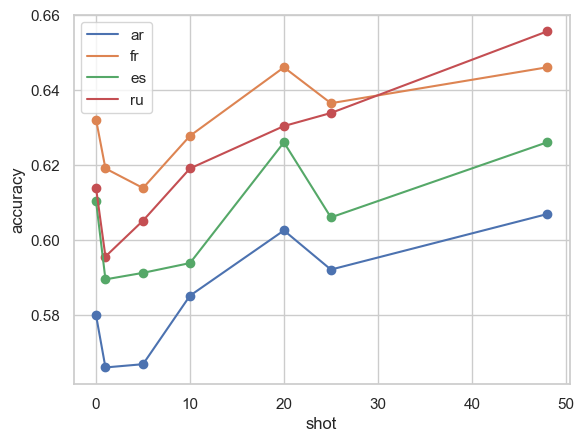

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

for lang in languages:
    x = [0, 1, 5, 10, 20, 25, 48]
    y = [accuracy_dict[f"{lang}_{shot}"] for shot in x]
    plt.plot(x, y, label=lang)
    plt.scatter(x, y)
    

plt.legend()
plt.xlabel("shot")
plt.ylabel("accuracy")
plt.show()